<a href="https://colab.research.google.com/github/BB-3022/DeepLearning/blob/main/ex02_%EC%86%90%EA%B8%80%EC%94%A8%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EB%A5%98(%EB%8B%A4%EC%A4%91%EB%B6%84%EB%A5%98).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 목표
- 손글씨 데이터를 분류하는 딥러닝 모델을 설계해보자!
- 다중분류 딥러닝 모델링을 연습해보자

In [1]:
# 기본라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 데이터 로딩

In [2]:
# keras 에서 제공해주는 손글씨데이터 불러오기
from tensorflow.keras.datasets import mnist

In [4]:
# 문제데이터와 정답데이터가 나뉘어 제공해주고 있다.
# 훈련용, 테스트용 데이터도 나뉘어 제공
(X_train, y_train),(X_test, y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
# 데이터 크기 확인
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
# 훈련데이터 6만장, 테스트데이터 1만장
# 사진데이터 28 * 28 픽셀
# 픽셀 : 사진의 정보를 가지고있는 단위(작은 사각형 하나가 1픽셀)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


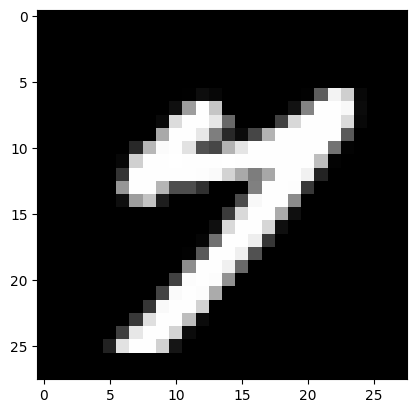

In [10]:
# 사진데이터 확인
plt.imshow(X_train[1001], cmap='gray')
# 흑백사진
# 0~255 검정색의 정도를 숫자로 가진다.

In [9]:
# 정답데이터 확인
np.unique(y_train) # 10개의 클래스를 가진다.

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### MLP 모델링
- 입력층의 구조, 출력층의 구조 고려
- 학습능력을 위한 중간층의 깊이 고려
- loss(오차), optimizer(최적화방법) 설정 해야 한다.

In [12]:
# 딥러닝 라이브러리 불러오기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Flatten
# Dense : 퍼셉트론을 묶음으로 표현하는 클래스
# InputLayer : 입력층 설정
# Flatten : 2차원 사진 데이터를 1차원으로 표현하기 위한 클래스

In [ ]:
# 1. 신경망 설계

# 뼈대
digit_model = Sequential()

# 입력층
digit_model.add(InputLayer (input_shape = (28,28))) # 28*28의 2차원 데이터

# 중간층
digit_model.add(Flatten()) # 2차원의 사진데이터를 1차원으로 변경(선형모델을 위한 작업)
digit_model.add(Dense(units = 16, activation = 'sigmoid'))
digit_model.add(Dense(units = 8, activation = 'sigmoid'))

# 출력층
digit_model.add(Dense(units = 10, activation = 'softmax'))
# 다중분류는 클래스의 개수만큼 선형모델이 필요하다.
# 활성화함수 : softmax(클래스 개수만큼 확률값이 출력 -> 총합 1로 만들어주는 함수)

In [ ]:
# 2. 모델 학습 및 평가 방법 설정
digit_model.compile(loss = 'categorical_crossentropy',
                    optimizer = 'SGD'
                    metrics = ['accuracy'])

In [ ]:
# 3. 모델 학습 및 시각화

In [ ]:
# 4. 모델 예측 및 평가